In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
x = np.linspace(0,100,200)
y = 0.7*x**2 + 20
print(y[:10])
for i in range(len(y)):
    y[i] += np.random.randn()*300

y = y.reshape(-1,1)

[ 20.          20.17676321  20.70705285  21.59086892  22.82821141
  24.41908033  26.36347567  28.66139744  31.31284564  34.31782026]


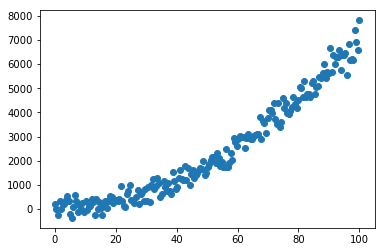

In [4]:
plt.scatter(x,y)

In [5]:
def make_design_matrix(x):
    X = np.ones((len(x), 2))
    X[:,1:] = x.reshape(-1,1)
    return X

In [6]:
def cost_function(y, y_hat):
    return np.sum(((y - y_hat)**2))/(2*len(y))

In [7]:
def init_weights(X):
    return np.zeros((X.shape[1], 1))

In [8]:
def sgd(w, X, y, alpha = 0.001):
    
    for i in range(1000):
        y_hat = X.dot(w)
        cost = cost_function(y, y_hat)
        if (i%50 == 0): print("Cost:", cost)
        gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
        #print(gradient)
        #print(w)
        w = w - alpha*gradient
    
    y_hat = X.dot(w)
    print("Final cost:", cost_function(y, y_hat))
    print(w)
    return w
    

In [9]:
def init_values(x):
    X = make_design_matrix(x)
    w = init_weights(X)
    return X, w

In [11]:
X, w = init_values(x)
w_new = sgd(w, X, y, 0.0001)
print(w_new)

Cost: 5171318.61988
Cost: 340805.050206
Cost: 340420.609229
Cost: 340037.135157
Cost: 339654.625561
Cost: 339273.078012
Cost: 338892.490093
Cost: 338512.859389
Cost: 338134.183494
Cost: 337756.460004
Cost: 337379.686526
Cost: 337003.860669
Cost: 336628.980051
Cost: 336255.042294
Cost: 335882.045027
Cost: 335509.985883
Cost: 335138.862505
Cost: 334768.672538
Cost: 334399.413634
Cost: 334031.083452
Final cost: 333663.679656
[[-26.62700268]
 [ 54.16472083]]
[[-26.62700268]
 [ 54.16472083]]


[[-26.62700268]
 [ 54.16472083]]


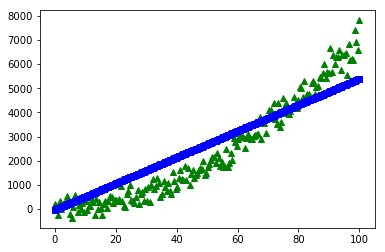

In [12]:
print(w_new)
y_pred = X.dot(w_new)
plt.plot(x, y, 'g^', x, y_pred, 'bs')

In [14]:
def sgd_new(w, X, y, alpha = 0.001):
    
    alpha_values = []
    
    y_hat = X.dot(w)
    old_gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
    w = w - alpha*old_gradient
    
    a = 0.0000001
    alpha_values.append(alpha)
    for i in range(1000):
        y_hat = X.dot(w)
        cost = cost_function(y, y_hat)
#         print(cost)
        if (i%50 == 0): print("Cost:", cost, "Alpha", alpha)
        new_gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
        
#         scaled_old_gradient = (old_gradient - np.mean(old_gradient))/np.std(old_gradient)
#         scaled_new_gradient = (new_gradient - np.mean(new_gradient))/np.std(new_gradient)
        
        scaled_old_gradient = (old_gradient)/np.linalg.norm(old_gradient)
        scaled_new_gradient = (new_gradient)/np.linalg.norm(new_gradient)
        
        dlr = -np.dot(scaled_old_gradient.T, scaled_new_gradient)
        # dlr = -np.dot(old_gradient.T, new_gradient)
        # taking cos (theta)
        
        w = w - alpha* new_gradient
        alpha = alpha - a*dlr
        alpha_values.append(alpha[0,0])
#         print("alpha:", alpha)
        old_gradient = new_gradient
        
    y_hat = X.dot(w)
    print("Final cost:", cost_function(y, y_hat))
    print(w)
    return w,alpha_values
        

Cost: 5171286.33087 Alpha 1e-09
Cost: 2460454.59722 Alpha [[  5.00100000e-06]]
Cost: 511119.185453 Alpha [[  1.00010000e-05]]
Cost: 343523.739124 Alpha [[  1.50009949e-05]]
Cost: 341042.868632 Alpha [[  1.99999889e-05]]
Cost: 340950.421013 Alpha [[  2.49993236e-05]]
Cost: 340844.696237 Alpha [[  2.99993230e-05]]
Cost: 340719.810298 Alpha [[  3.49993230e-05]]
Cost: 340575.807834 Alpha [[  3.99993230e-05]]
Cost: 340412.743085 Alpha [[  4.49993230e-05]]
Cost: 340230.677431 Alpha [[  4.99993230e-05]]
Cost: 340029.679359 Alpha [[  5.49993230e-05]]
Cost: 339809.824412 Alpha [[  5.99993230e-05]]
Cost: 339571.19515 Alpha [[  6.49993230e-05]]
Cost: 339313.881094 Alpha [[  6.99993230e-05]]
Cost: 339037.978669 Alpha [[  7.49993230e-05]]
Cost: 338743.591146 Alpha [[  7.99993230e-05]]
Cost: 338430.828576 Alpha [[  8.49993230e-05]]
Cost: 338099.807726 Alpha [[  8.99993230e-05]]
Cost: 337750.651997 Alpha [[  9.49993230e-05]]
Final cost: 337383.491359
[[-12.98380498]
 [ 53.96057038]]
[[-12.98380498]
 

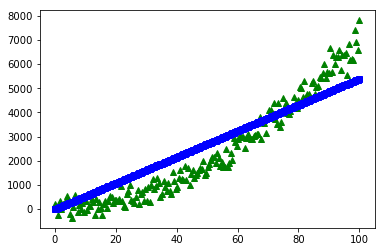

In [15]:
X, w = init_values(x)
w_new, alpha_values = sgd_new(w, X, y, 0.000000001)
print(w_new)
y_pred = X.dot(w_new)
plt.plot(x, y, 'g^', x, y_pred, 'bs')

In [16]:
plt.scatter(alpha_values)

TypeError: scatter() missing 1 required positional argument: 'y'